In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Q2
When heart muscle is deprived of oxygen, the tissue dies and leads to a heart attack ("myocardial
infarction"). Apparently, cooling the heart reduces the size of the heart attack. It is not known, however,
whether cooling is only effective if it takes place before the blood, flow to the heart becomes restricted.
Some researchers (Hale, et al, 1997) hypothesized that cooling the heart would be effective in reducing
the size of the heart attack even if it takes place after the blood flow becomes restricted.
To investigate their hypothesis, the researchers conducted an experiment on 32 anesthetized rabbits
that were subjected to a heart attack. The researchers established three experimental groups:

Rabbits whose hearts were cooled to 6º C within 5 minutes of the blocked artery ("early cooling")

Rabbits whose hearts were cooled to 6º C within 25 minutes of the blocked artery ("late cooling")

Rabbits whose hearts were not cooled at all ("no cooling")
At the end of the experiment, the researchers measured the size of the infarcted (i.e., damaged) area (in
grams) in each of the 32 rabbits. But, as you can imagine, there is great variability in the size of hearts.
The size of a rabbit's infarcted area may be large only because it has a larger heart. Therefore, in order
to adjust for differences in heart sizes, the researchers also measured the size of the region at risk for
infarction (in grams) in each of the 32 rabbits.

With their measurements in hand, the researchers' primary research question was: Does the mean size
of the infarcted area differ among the three treatment groups — no cooling, early cooling, and late
cooling — when controlling for the size of the region at risk for infarction?
A regression model that the researchers might use in answering their research question is:
yi=(β0+β1xi1+β2xi2+β3xi3)+ϵi

yi is the size of the infarcted area (in grams) of rabbit i

xi1 is the size of the region at risk (in grams) of rabbit i

xi2 = 1 if early cooling of rabbit i, 0 if not

xi3 = 1 if late cooling of rabbit i, 0 if not

and the independent error terms εi follow a normal distribution with mean 0 and equal variance σ2.
Illustrates the need for being able to "translate" a research question into a statistical procedure. Often,
the procedure involves four steps, namely:

formulating a multiple regression model

determining how the model helps answer the research question

checking the model

and performing a hypothesis test (or calculating a confidence interval)



a. Create a CSV file with sample data.

b. Write a Python function program to:

c. Find the fitted multiple linear regression equation for the given data.

d. Compare the coefficients obtained manually using intuitive and matrix formulation methods with
your program.

e. Plot the data adorned with the estimated regression equation.

f. Compute the error, MSE, and RMSE.


In [2]:
df=pd.read_csv('rabbit_data.csv')
df

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [3]:
X1=df['Area']
X2=df['X2']
X3=df['X3']

In [4]:
n=len(df)
y=df['Infarc']

x1 = np.sum(X1)
x2 = np.sum(X2)
x3 = np.sum(X3)

x1x1 = np.sum(X1**2)
x2x2 = np.sum(X2**2)
x3x3 = np.sum(X3**2)

x1x2 = np.sum(X1*X2)
x1x3 = np.sum(X1*X3)
x2x3 = np.sum(X2*X3)

y_sum=np.sum(y)
yx1 = np.sum(y*X1)
yx2 = np.sum(y*X2)
yx3 = np.sum(y*X3)


In [5]:
M = np.array([[n, x1, x2, x3],
              [x1, x1x1, x1x2, x1x3],
              [x2, x1x2, x2x2, x2x3],
              [x3, x1x3, x2x3, x3x3],
              ])

N = np.array([[y_sum], 
              [yx1], 
              [yx2], 
              [yx3]
            ])

In [6]:
A = np.dot(np.linalg.inv(M), N)
a0, a1, a2, a3 = A[0][0], A[1][0], A[2][0], A[3][0]

y_pred = a0 + a1*X1 + a2*X2 + a3*X3

predicted_df = pd.DataFrame({'Area': X1, 'X1': X1, 'X2': X2, 'Actual Infarc': y, 'Predicted Infarc': y_pred})
predicted_df

,Area,X1,X2,Actual Infarc,Predicted Infarc
0,0.34,0.34,0,0.119,0.073766
1,0.64,0.64,0,0.190,0.257563
2,0.76,0.76,0,0.395,0.331081
3,0.83,0.83,0,0.469,0.373967
4,0.73,0.73,0,0.130,0.312702
5,0.82,0.82,0,0.311,0.367841
6,0.95,0.95,0,0.418,0.447486
7,1.06,1.06,0,0.480,0.514878
8,1.20,1.20,0,0.687,0.600650
9,1.47,1.47,0,0.847,0.766066


In [7]:
error_df = pd.DataFrame({'y': y, 'y_pred': y_pred, 'Error': y - y_pred})
error_df

,y,y_pred,Error
0,0.119,0.073766,0.045234
1,0.190,0.257563,-0.067563
2,0.395,0.331081,0.063919
3,0.469,0.373967,0.095033
4,0.130,0.312702,-0.182702
5,0.311,0.367841,-0.056841
6,0.418,0.447486,-0.029486
7,0.480,0.514878,-0.034878
8,0.687,0.600650,0.086350
9,0.847,0.766066,0.080934


In [8]:
E = error_df['Error']
MSE = np.sum(E**2)/n
RMSE = np.sqrt(MSE)

print('MSE: ', MSE)
print('RMSE: ', RMSE)

MSE:  0.0170284226245642
RMSE:  0.13049299837372194


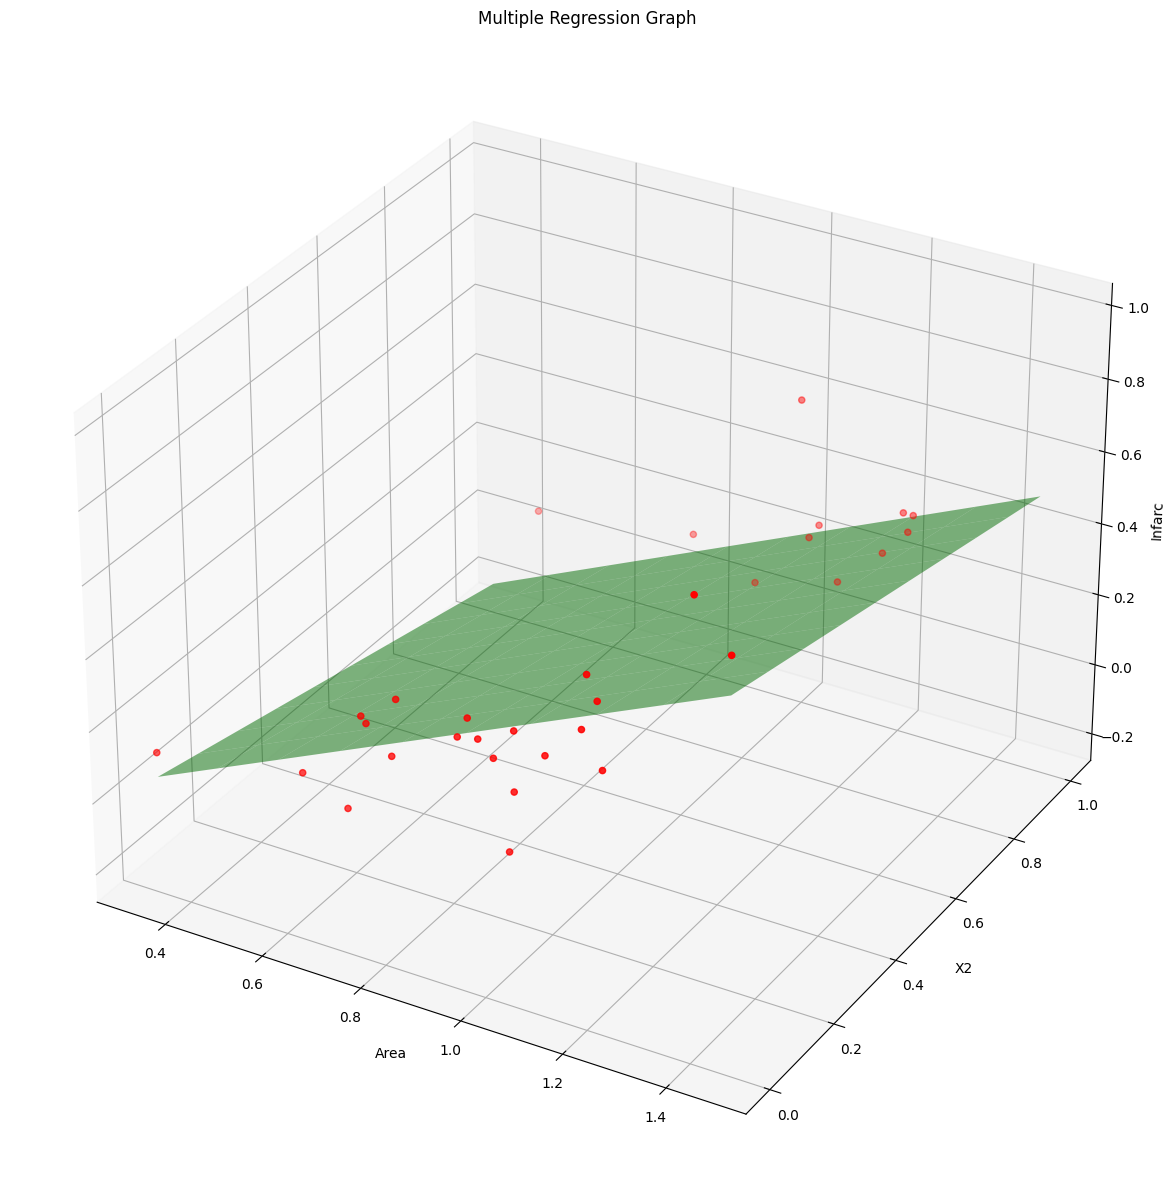

In [9]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, color='red', label='Actual data')

X1_range, X2_range = np.meshgrid(np.linspace(X1.min(), X1.max(), 10),
                                 np.linspace(X2.min(), X2.max(), 10))
X3_range = np.mean(X3)  
y_surface = a0 + a1*X1_range + a2*X2_range + a3*X3_range

ax.plot_surface(X1_range, X2_range, y_surface, color='green', alpha=0.5, label='Regression surface')

ax.set_xlabel('Area')
ax.set_ylabel('X2')
ax.set_zlabel('Infarc')
ax.set_title('Multiple Regression Graph')

plt.show()